Although quite powerful, SymPy may be slower than other computer algebra systems. The main reason is that SymPy is written in pure Python. A faster and more complete mathematics system is Sage (see also the Getting started with Sage recipe in this chapter). Sage is a heavy standalone program that has many dependencies (including SymPy), and it uses only Python 2 at the time of writing. It is essentially meant for interactive use. Sage can be used with the Jupyter Notebook.



In [1]:
from sympy import *
init_printing()

To deal with symbolic variables, we first need to declare them:


In [2]:
var('x y')

The var() function creates symbols and injects them into the namespace. This function should only be used in the interactive mode. In a Python module, it is better to use the symbols() function that returns the symbols:


In [3]:
x, y = symbols('x y')

We can create mathematical expressions with these symbols:

In [6]:
expr1 = (x + 1) ** 2
expr2 = x**2 + 2 * x + 1
print(expr1 == expr2)

False


These expressions are mathematically equal, but not syntactically identical. To test whether they are mathematically equal, we can ask SymPy to simplify the difference algebraically:


In [7]:
simplify(expr1 - expr2)

A very common operation with symbolic expressions is the substitution of a symbol by another symbol, expression, or a number, using the subs() method of a symbolic expression:


In [10]:
expr1.subs(x, expr1)

In [9]:
expr1.subs(x, pi)

A rational number cannot be written simply as 1/2 as this Python expression evaluates to 0.5. A possibility is to convert the number 1 into a SymPy integer object, for example by using the S() function:


In [11]:
expr1.subs(x, S(1) / 2)

Exactly represented numbers can be evaluated numerically with evalf():


In [12]:
_.evalf()

SymPy offers several ways to solve linear and nonlinear equations and systems of equations. Of course, these functions do not always succeed in finding closed-form exact solutions. In this case, we can fall back to numerical solvers and obtain approximate solutions.



In [16]:
from sympy import *
init_printing()
var('x y z a')

In [17]:
solve(x**2 - a, x)

In [18]:
x = Symbol('x')
solve_univariate_inequality(x**2 > 4, x)

The solve() function also accepts systems of equations (here, a linear system):


In [19]:
solve([x + 2*y + 1, x - 3*y - 2], x, y)

Nonlinear systems are also handled:


In [20]:
solve([x**2 + y**2 - 1, x**2 - y**2 - S(1) / 2], x, y)

Singular linear systems can also be solved (here, there is an infinite number of solutions because the two equations are collinear):


In [21]:
solve([x + 2*y + 1, -x - 2*y - 1], x, y)

SymPy contains a rich calculus toolbox to analyze real-valued functions: limits, power series, derivatives, integrals, Fourier transforms, and so on. In this recipe, we will show the very basics of these capabilities.



In [22]:
from sympy import *
init_printing()
var('x z')

In [23]:
f = 1 / (1 + x**2)

Let's evaluate this function at 1:

In [24]:
f.subs(x, 1)

We can compute the derivative of this function:


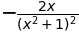

In [25]:
diff(f, x)

What is How to do it...'s limit to infinity? (Note the double o (oo) for the infinity symbol):

In [26]:
limit(f, x, oo)

Here's how to compute a Taylor series (here, around 0, of order 9). The Big O can be removed with the removeO() method.


In [27]:
series(f, x0=0, n=9)

We can compute definite integrals (here, over the entire real line):


In [28]:
integrate(f, (x, -oo, oo))

SymPy can also compute indefinite integrals:


In [29]:
integrate(f, x)

Finally, let's compute How to do it...'s Fourier transforms

In [31]:
fourier_transform(f, x, z)